# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | nar'yan-mar
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | jiangyou
Processing Record 8 of Set 1 | suva
Processing Record 9 of Set 1 | shofirkon shahri
City not found. Skipping...
Processing Record 10 of Set 1 | shats'k
Processing Record 11 of Set 1 | kyren
Processing Record 12 of Set 1 | ulladulla
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | bamboo flat
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | hopkinsville
Processing Record 20 of Set 1 | prince george
Processing Record 21 of Set 1 | waveland
Processing Record 22 of Set 1 | 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-23.33,79,7,2.15,RU,1711847365
1,avarua,-21.2078,-159.7750,31.03,74,75,4.12,CK,1711847366
2,rio grande,-32.0350,-52.0986,21.81,85,0,2.26,BR,1711847290
3,nar'yan-mar,67.6713,53.0870,-15.50,93,75,3.13,RU,1711847366
4,thompson,55.7435,-97.8558,-8.29,93,100,3.17,CA,1711847351


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-23.33,79,7,2.15,RU,1711847365
1,avarua,-21.2078,-159.7750,31.03,74,75,4.12,CK,1711847366
2,rio grande,-32.0350,-52.0986,21.81,85,0,2.26,BR,1711847290
3,nar'yan-mar,67.6713,53.0870,-15.50,93,75,3.13,RU,1711847366
4,thompson,55.7435,-97.8558,-8.29,93,100,3.17,CA,1711847351


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

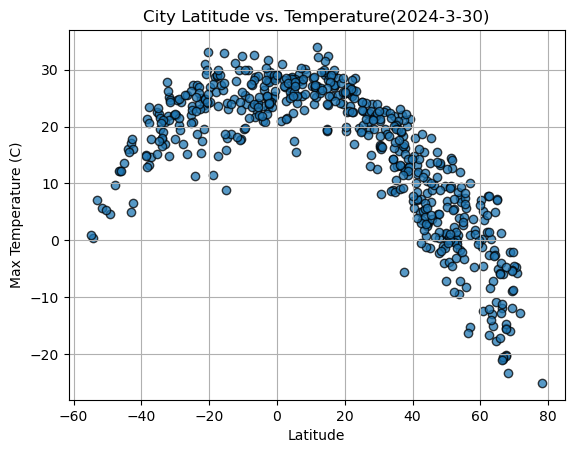

In [27]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature(2024-3-30)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

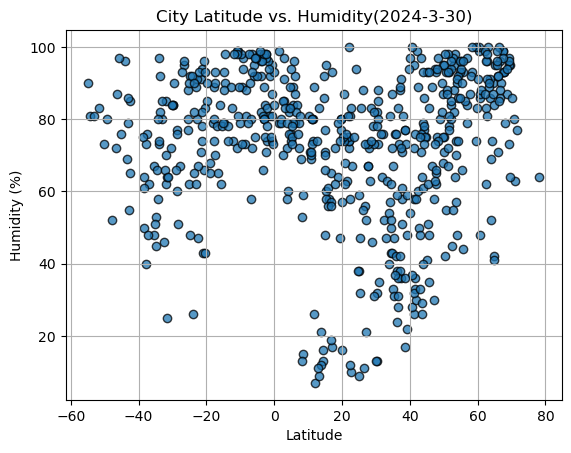

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2024-3-30)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

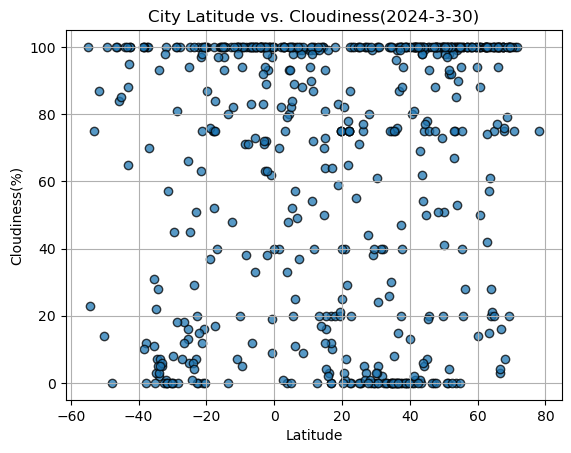

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2024-3-30)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

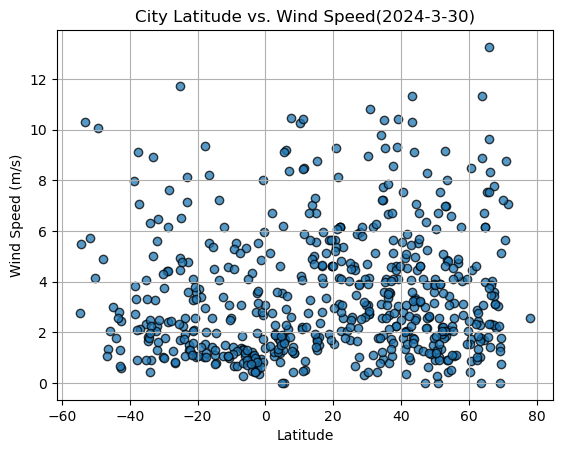

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2024-3-30)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-23.33,79,7,2.15,RU,1711847365
3,nar'yan-mar,67.6713,53.0870,-15.50,93,75,3.13,RU,1711847366
4,thompson,55.7435,-97.8558,-8.29,93,100,3.17,CA,1711847351
5,keflavik,64.0049,-22.5624,-1.76,69,20,11.32,IS,1711847367
6,jiangyou,31.7667,104.7167,19.57,64,2,1.09,CN,1711847081


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,31.03,74,75,4.12,CK,1711847366
2,rio grande,-32.0350,-52.0986,21.81,85,0,2.26,BR,1711847290
7,suva,-18.1416,178.4415,28.71,79,75,1.03,FJ,1711847368
10,ulladulla,-35.3500,150.4667,22.57,67,11,2.32,AU,1711847370
15,bredasdorp,-34.5322,20.0403,19.63,66,7,1.83,ZA,1711847333


###  Temperature vs. Latitude Linear Regression Plot

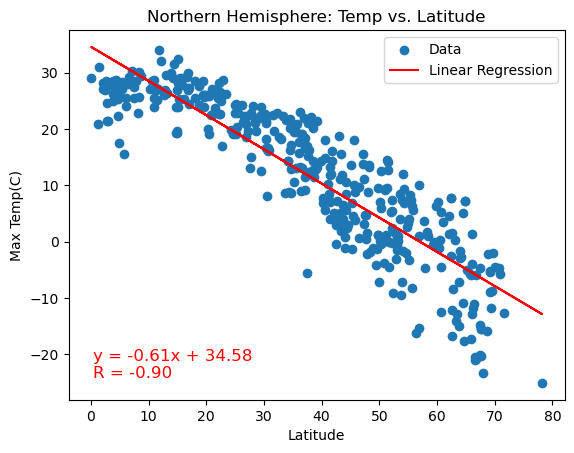

In [72]:
# Linear regression on Northern Hemisphere

# x and y data
x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Max Temp']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_northern, y_northern)

# Plotting data and regression line
plt.scatter(x_northern, y_northern, label='Data')
plt.plot(x_northern, slope * x_northern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('Northern Hemisphere: Temp vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.legend()
plt.show()

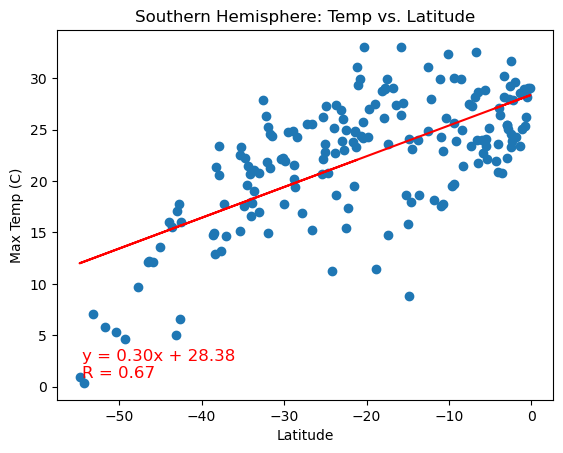

In [73]:
# Linear regression on Southern Hemisphere

# x and y data
x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Max Temp']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_southern, y_southern)

# Plotting data and regression line
plt.scatter(x_southern, y_southern, label='Data')
plt.plot(x_southern, slope * x_southern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Southern Hemisphere: Temp vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.show()

**Discussion about the linear relationship:
In the Northern Hemisphere, there is a strong negative linear relationship between temperature and latitude, indicating that temperatures tend to decrease as you move towards the North Pole.
In the Southern Hemisphere, there is a moderate positive linear relationship between temperature and latitude, suggesting that temperatures tend to increase as you move towards the Equator.

### Humidity vs. Latitude Linear Regression Plot

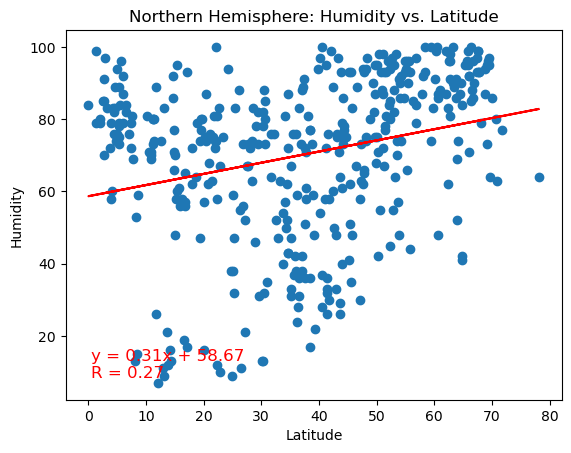

In [59]:
# Northern Hemisphere

# x and y data
x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Humidity']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_northern, y_northern)

# Plotting data and regression line
plt.scatter(x_northern, y_northern, label='Data')
plt.plot(x_northern, slope * x_northern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.show()

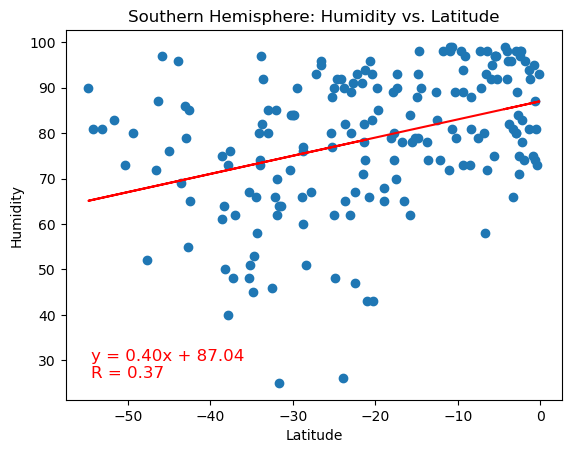

In [60]:
# Southern Hemisphere
# x and y data
x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Humidity']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_southern, y_southern)

# Plotting data and regression line
plt.scatter(x_southern, y_southern, label='Data')
plt.plot(x_southern, slope * x_southern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.show()

**Discussion about the linear relationship:
For the Northern Hemishphere, the positive sign of R (0.27) indicates a weak positive linear relationship between humidity and latitude. As latitude moves towards the North Pole, humidity tends to increase, though the relationship is not very strong. The weak positive correlation suggests that while there may be a slight tendency for humidity to increase with latitude in the Northern Hemisphere, other factors may have a more significant influence.

For the Southern Hemishpere, there is a moderate positive linear relationship between humidity and latitude. As latitude increases (moving towards the Equator), humidity tends to increase. The moderate positive correlation suggests that there is a noticeable tendency for humidity to increase with latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

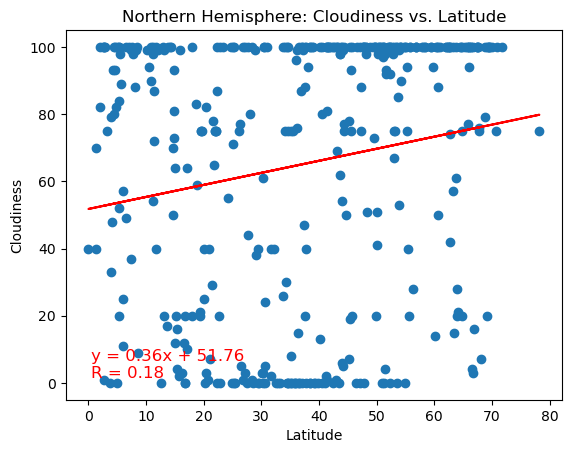

In [61]:
# Northern Hemisphere
# x and y data
x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Cloudiness']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_northern, y_northern)

# Plotting data and regression line
plt.scatter(x_northern, y_northern, label='Data')
plt.plot(x_northern, slope * x_northern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.show()

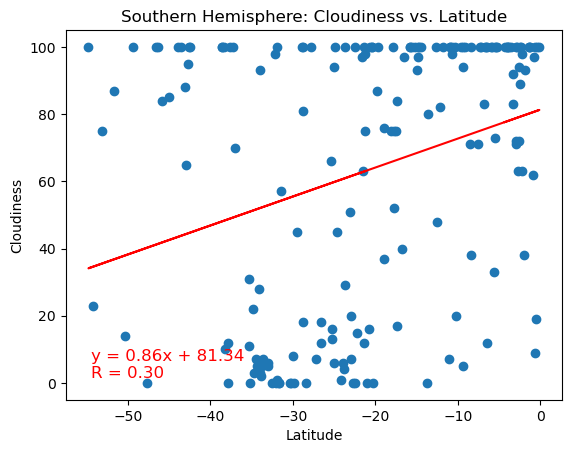

In [62]:
# Southern Hemisphere
# x and y data
x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Cloudiness']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_southern, y_southern)

# Plotting data and regression line
plt.scatter(x_southern, y_southern, label='Data')
plt.plot(x_southern, slope * x_southern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.show()

**Discussion about the linear relationship: For both the Northern and Southern Hemispheres, we see that there is a weak positive linear relationship between cloudiness and latitude. The Southern Hemisphere however indicates cloudiness may increase as latitude increases as well. However, this relationship is weak. 

### Wind Speed vs. Latitude Linear Regression Plot

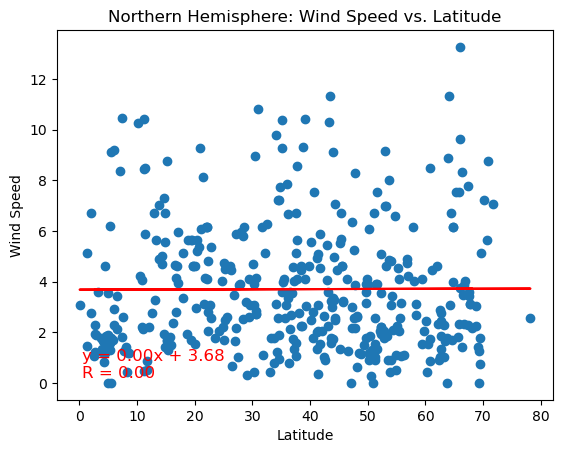

In [63]:
# Northern Hemisphere
# x and y data
x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Wind Speed']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_northern, y_northern)

# Plotting data and regression line
plt.scatter(x_northern, y_northern, label='Data')
plt.plot(x_northern, slope * x_northern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

# Show plot
plt.show()

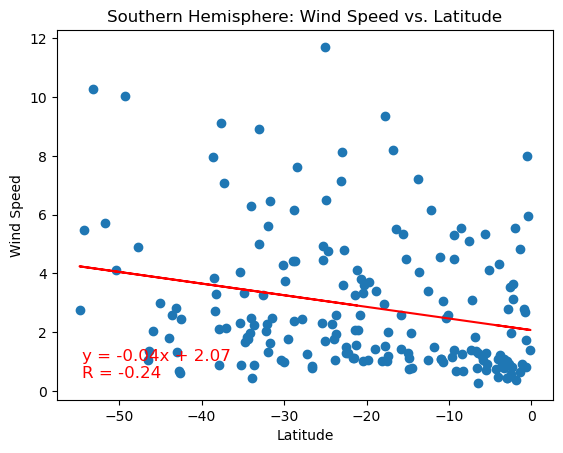

In [71]:
# Southern Hemisphere
# x and y data
x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Wind Speed']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_southern, y_southern)

# Plotting data and regression line
plt.scatter(x_southern, y_southern, label='Data')
plt.plot(x_southern, slope * x_southern + intercept, color='red', label='Linear Regression')

# abels and legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')

# Linear regression formula as annotation
plt.text(0.05, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')


# Show plot
plt.show()

**Discussion about the linear relationship:
For the Northern Hemisphere, the R value of 0.0 indicates no linear relationship between wind speed and latitude. Based on the above findings, we can also conclude that wind speed does not change as latitude changes and there is a constant wind speed across all latitudes in the Northern Hemisphere.
For the Southern Hemisphere, negative sign of R (-0.24), indicates a weak negative linear relationship between wind speed and latitude in the Southern Hemisphere.
As latitude increases and moves towards the Equator, wind speed tends to decrease slightly, though the relationship is weak.